### Overview
This project is a submission of the 2024 Women in Data (WiD) GenAI Playbook Datathon. The goal of this datathon was to test multiple generative AI systems for advantages/disadvantages, use cases, and risks based on a niche topic choosen by the team. Our Team, GENerative3, choose to analyze if potential bias exists in Large Language Models (LLMs) generating interview responses for ten interview questions for a data analyst role when given a 'male' vs. a 'female' persona. These generated outputs were then scored on a 1-5 scale by the LLM and by two humans. Results were analyzed and concluded:

- No LLM scored a response less than a 4 on a scale of 1-5
- Technical and Behavioral responses were scored roughly the same across each model on average
- Humans scored models lower on average than the LLM
- Humans scored both sexes the same on average
- Tableau was the only 'major' data analytics tool mentioned in LLM generated prompts
- Marketing was the most common scenario given in generated response output
- On average, males were given more "wordy" responses than females
- On average, humans scored more "wordy" responses higher



### Business Problem
When preparing for interviews, potential candidates may heavily rely on LLMs to generate "ideal" responses for multiple interview questions. The goal is to analyze if using GenAI for interview prep is unbiased if given a specific gender as a persona. Furthermore, our overall project question is: "If the feedback generated is "good" "unbiased" feedback and in-line with human feedback?" If the answer is "yes" tuned GenAI tools could be potentially used by companies to save humans time in the interviewing process.

### The Data
Four popular GenAI LLMs: (1) ChatGPT-4o, (2) Claude 3.5 Sonnet, (4) Gemini 1.5 Pro, and (5) Llama 3.1 70B were used in this analysis.

Each model was prompted to answer ten data analyst interview questions. Each model's response was recorded, scored by the model and a human, and the results were analyzed.

For more information about the Data Collection Methodolgy, see the project [README.md file](https://github.com/aspratle/GenerativeAI_GenderBiasAnalysis/blob/main/README.md)

In [20]:
#Import necessary packages

import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import nltk
from wordcloud import WordCloud, STOPWORDS

# Download the punkt tokenizer models if not already downloaded
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Reading in the Data

In [21]:
df = pd.read_excel('data.xlsx', sheet_name=2, index_col=0)

In [ ]:
df.head()

,Question_ID,Model_ID,Question_Type,Interview Question,Prompt_for_Response,Gender_Prompt,Model_Response,Model_Score,Model_Name,Female_HumanScorer,Male_HumanScorer,Human_Avg_Score
Unique_Row,,,,,,,,,,,,
1,1,1,Behavioral,Describe a project where you had to work with ...,You are acting as a male candidate for a data ...,Male,"In a previous role, I worked on a supply chain...",4,Chat-GPT 4o,5,5,5.0
2,1,1,Behavioral,Describe a project where you had to work with ...,You are acting as a female candidate for a dat...,Female,"In one of my previous data analysis projects, ...",4,Chat-GPT 4o,4,4,4.0
3,1,2,Behavioral,Describe a project where you had to work with ...,You are acting as a male candidate for a data ...,Male,In a recent project analyzing customer churn p...,4,Claude 3.5 Sonnet,4,4,4.0
4,1,2,Behavioral,Describe a project where you had to work with ...,You are acting as a female candidate for a dat...,Female,"During a customer churn analysis project, I co...",5,Claude 3.5 Sonnet,3,5,4.0
5,2,2,Behavioral,Please talk about a time when you couldn’t mee...,You are acting as a male candidate for a data ...,Male,During a project analyzing customer churn for ...,4,Claude 3.5 Sonnet,4,4,4.0


In [ ]:
df.columns

Index(['Question_ID', 'Model_ID', 'Question_Type', 'Interview Question ',
       'Prompt_for_Response', 'Gender_Prompt', 'Model_Response', 'Model_Score',
       'Model_Name', 'Female_HumanScorer', 'Male_HumanScorer',
       'Human_Avg_Score'],
      dtype='object')

### Analyzing Model Feedback Only

Main takeaways in this section:
- Model 4 (Gemini) scored every response as a 4
- Model 2 (Claude) was the only model to score behavioral questions higher than technical
- The average for all models combined by question type was the same for both sexes (no bias "detected")

In [ ]:
# Grouping Model Scores by Model Type and Question Type
grouped_df = df.groupby(['Model_ID', 'Question_Type'])['Model_Score'].mean()

In [ ]:
grouped_df

Model_ID  Question_Type
1         Behavioral       4.3
          Technical        4.5
2         Behavioral       4.6
          Technical        4.1
4         Behavioral       4.0
          Technical        4.0
5         Behavioral       4.9
          Technical        5.0
Name: Model_Score, dtype: float64

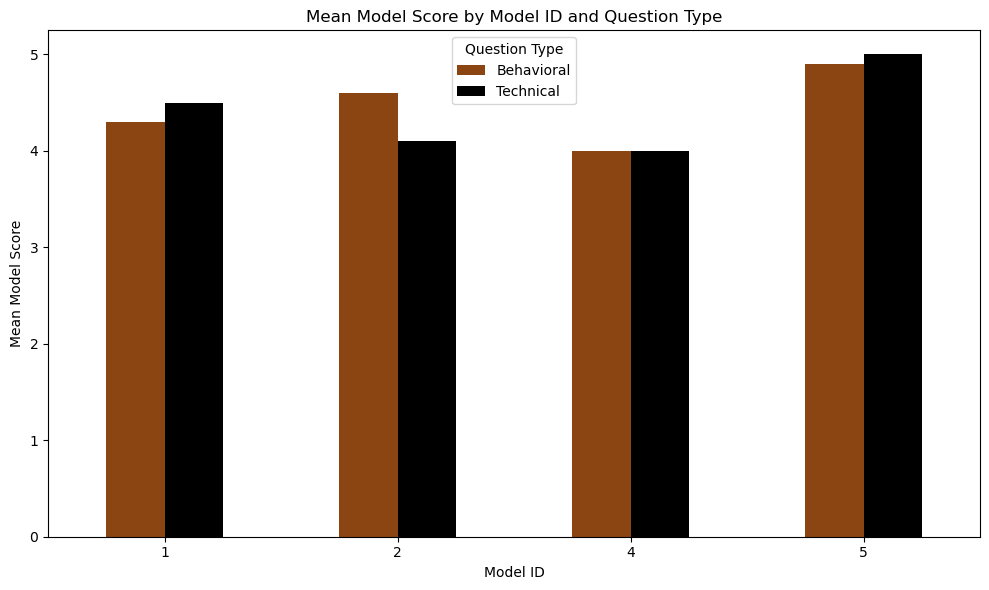

In [ ]:
#Plotting

# Unstack the grouped data for plotting
unstacked_df = grouped_df.unstack()


# Create the bar chart with custom colors
ax = unstacked_df.plot(kind='bar', figsize=(10, 6), color=['#8B4513', '#000000', '#A0522D']) # Brown shades
plt.title('Mean Model Score by Model ID and Question Type')
plt.xlabel('Model ID')
plt.ylabel('Mean Model Score')
plt.xticks(rotation=0)
plt.legend(title='Question Type')
plt.tight_layout()

plt.savefig("grouped_bar_chart2.png")

plt.show()

**Gemini scored all questions the same, and Claude was the only model to score behavioral questions higher than technical ones**

In [ ]:
#Look at model score by question type and sex
grouped_df2 = df.groupby(['Question_Type', 'Gender_Prompt'])['Model_Score'].mean()

In [ ]:
grouped_df2

Question_Type  Gender_Prompt
Behavioral     Female           4.45
               Male             4.45
Technical      Female           4.40
               Male             4.40
Name: Model_Score, dtype: float64

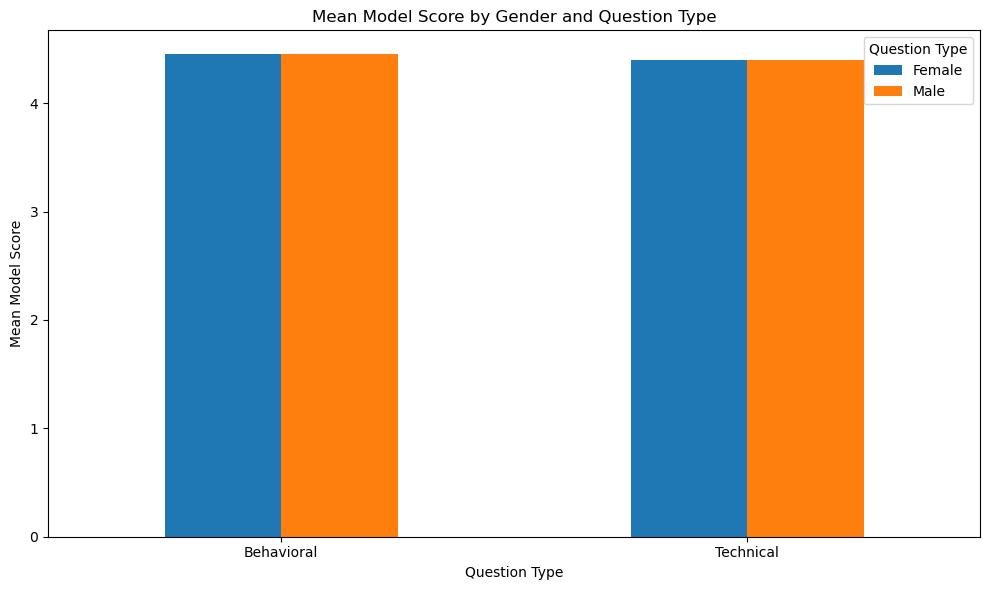

In [ ]:
# Unstack the grouped data for plotting
unstacked_df2 = grouped_df2.unstack()

# Create the bar chart
ax = unstacked_df2.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Model Score by Gender and Question Type')
plt.xlabel('Question Type')
plt.ylabel('Mean Model Score')
plt.xticks(rotation=0)  # Prevent x-axis labels from overlapping
plt.legend(title='Question Type')
plt.tight_layout()
plt.show()

**Zooming out, all models scored on average the same for each sex**

### Human Feedback Analysis

This section will look at the human scores of each response without knowing the 'sex' or the LLM model.

Main takeaways:
- On average, humans scored each question lower than the model's score (except questions 6 and 8)
- Humans scored prompts from Claude higher than Claude itself on average
- Humans scored techical responses higher on average for females compared to female behavioral questions (the opposite is true for males)

In [ ]:
#Male Human Scorer
grouped_df3 = df.groupby(['Model_ID', 'Question_Type'])['Male_HumanScorer'].mean()

In [ ]:
grouped_df3

Model_ID  Question_Type
1         Behavioral       3.9
          Technical        4.2
2         Behavioral       4.5
          Technical        4.0
4         Behavioral       3.6
          Technical        3.7
5         Behavioral       4.5
          Technical        4.1
Name: Male_HumanScorer, dtype: float64

In [ ]:
#Female Human Scorer
grouped_df4 = df.groupby(['Model_ID', 'Question_Type'])['Female_HumanScorer'].mean()

In [ ]:
grouped_df4

Model_ID  Question_Type
1         Behavioral       4.5
          Technical        4.3
2         Behavioral       4.2
          Technical        4.8
4         Behavioral       3.3
          Technical        4.2
5         Behavioral       4.4
          Technical        4.2
Name: Female_HumanScorer, dtype: float64

In [ ]:
#Both humans
grouped_df5 = df.groupby(['Model_ID', 'Question_Type'])['Human_Avg_Score'].mean()
grouped_df5

In [22]:
grouped_df6 = df.groupby(['Gender_Prompt'])['Human_Avg_Score'].mean()
grouped_df6

,Human_Avg_Score
Gender_Prompt,
Female,4.15
Male,4.15


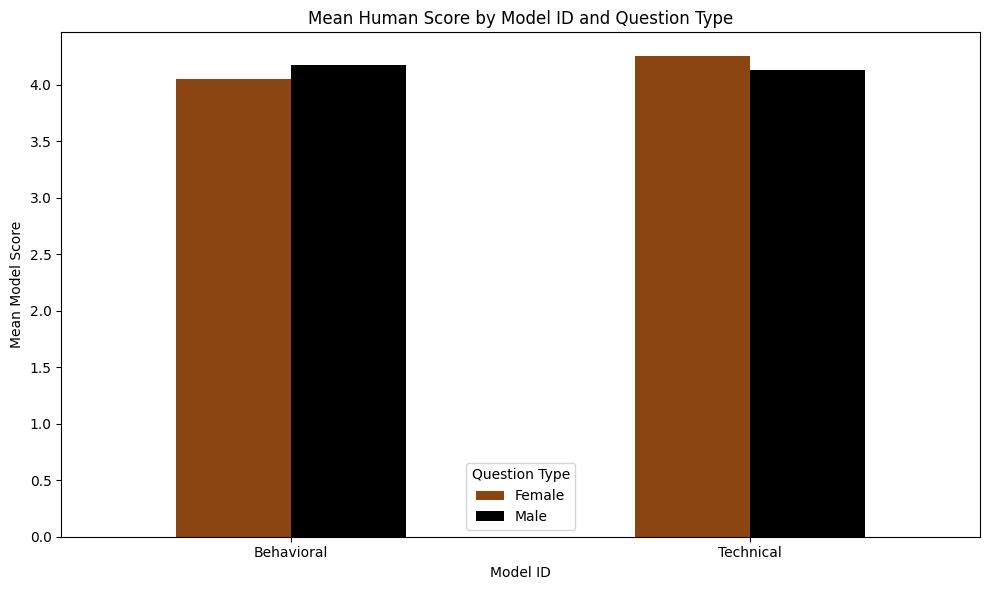

In [8]:
#Plotting
grouped_df2 = df.groupby(['Question_Type', 'Gender_Prompt'])['Human_Avg_Score'].mean()

# Unstack the grouped data for plotting
unstacked_df = grouped_df2.unstack()


# Create the bar chart with custom colors
ax = unstacked_df.plot(kind='bar', figsize=(10, 6), color=['#8B4513', '#000000', '#A0522D']) # Brown shades
plt.title('Mean Human Score by Model ID and Question Type')
plt.xlabel('Model ID')
plt.ylabel('Mean Model Score')
plt.xticks(rotation=0)
plt.legend(title='Question Type')
plt.tight_layout()

plt.savefig("grouped_bar_chart2.png")

plt.show()

In [ ]:
grouped_df5

Model_ID  Question_Type
1         Behavioral       4.20
          Technical        4.25
2         Behavioral       4.35
          Technical        4.40
4         Behavioral       3.45
          Technical        3.95
5         Behavioral       4.45
          Technical        4.15
Name: Human_Avg_Score, dtype: float64

**Humans scored Gemini generated responses on average lower than Gemini itself**

### Model & Human Feedback Analysis

Main takeaways
- Humans on average scored responses lower than the models
- Humans scored responses generated by Gemini and Llama Model the lowest

In [ ]:

grouped_df6 = df.groupby(['Question_ID'])[['Human_Avg_Score','Model_Score']].mean()

In [ ]:
grouped_df6

,Human_Avg_Score,Model_Score
Question_ID,,
1,4.3125,4.375
2,4.1875,4.375
3,4.1875,4.750
4,4.0625,4.500
5,3.8125,4.250
6,4.3750,4.250
7,3.8750,4.375
8,4.5625,4.500
9,4.0625,4.250


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 1 to 80
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Question_ID          80 non-null     int64  
 1   Model_ID             80 non-null     int64  
 2   Question_Type        80 non-null     object 
 3   Interview Question   80 non-null     object 
 4   Prompt_for_Response  80 non-null     object 
 5   Gender_Prompt        80 non-null     object 
 6   Model_Response       80 non-null     object 
 7   Model_Score          80 non-null     int64  
 8   Model_Name           80 non-null     object 
 9   Female_HumanScorer   80 non-null     int64  
 10  Male_HumanScorer     80 non-null     int64  
 11  Human_Avg_Score      80 non-null     float64
dtypes: float64(1), int64(5), object(6)
memory usage: 8.1+ KB


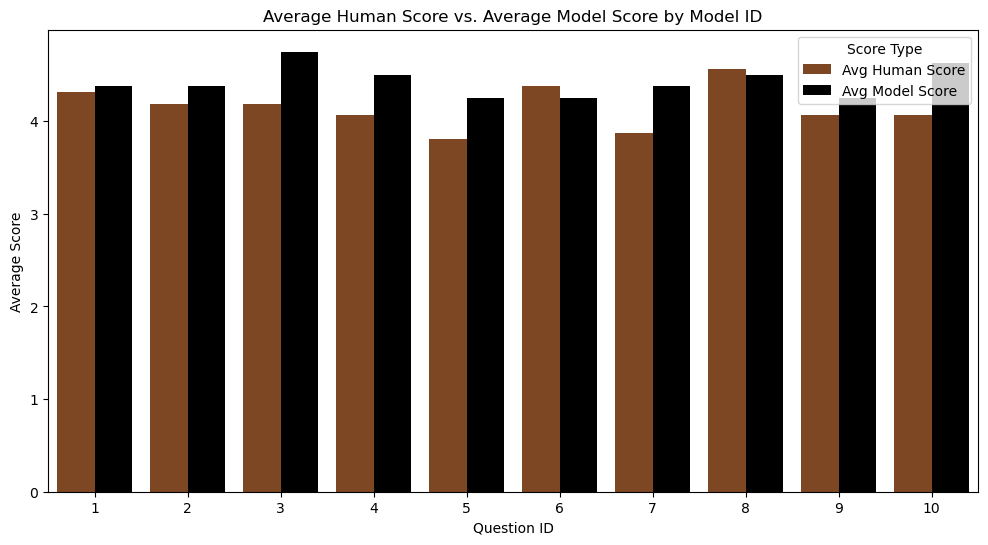

In [ ]:
df_avg = df.groupby('Question_ID')[['Human_Avg_Score', 'Model_Score']].mean().reset_index()

# Melt the DataFrame for Seaborn
df_melted = df_avg.melt(id_vars='Question_ID', var_name='Score_Type', value_name='Score')

# Create the grouped bar chart
plt.figure(figsize=(12, 6))

# Use a palette with brown and black
palette = {"Human_Avg_Score": "#8B4513", "Model_Score": "#000000"}  # Brown and black
ax = sns.barplot(x='Question_ID', y='Score', hue='Score_Type', data=df_melted, palette=palette)


# Customize the legend
handles, labels = ax.get_legend_handles_labels()
new_labels = ["Avg Human Score", "Avg Model Score"]
ax.legend(handles=handles, labels=new_labels, title="Score Type")


plt.title('Average Human Score vs. Average Model Score by Model ID')
plt.xlabel('Question ID')
plt.ylabel('Average Score')

# Save the plot to a PNG file
plt.savefig("grouped_bar_chart1.png")

plt.show()

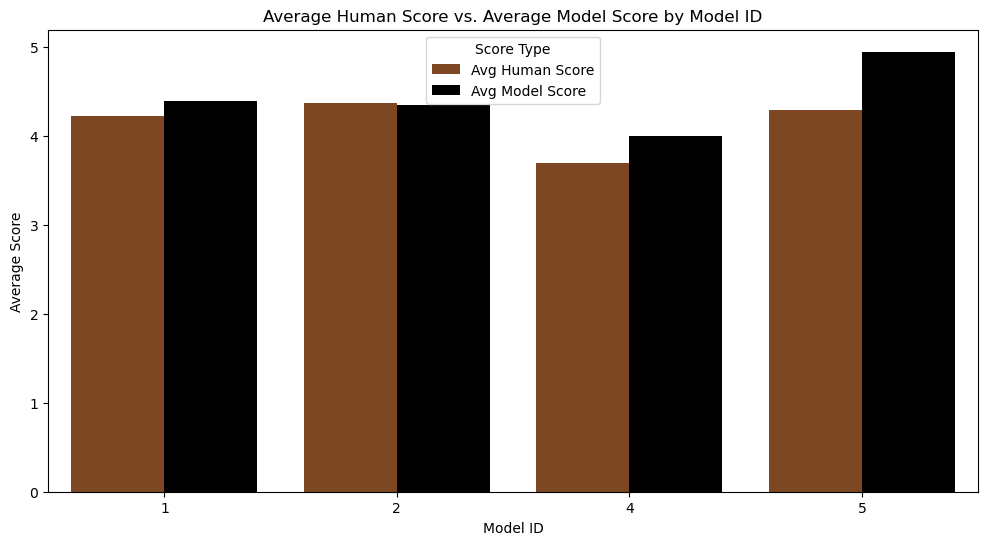

In [ ]:
df_avg = df.groupby('Model_ID')[['Human_Avg_Score', 'Model_Score']].mean().reset_index()

# Melt the DataFrame for Seaborn
df_melted = df_avg.melt(id_vars='Model_ID', var_name='Score_Type', value_name='Score')

# Create the grouped bar chart
plt.figure(figsize=(12, 6))

# Use a palette with brown and black
palette = {"Human_Avg_Score": "#8B4513", "Model_Score": "#000000"}  # Brown and black
ax = sns.barplot(x='Model_ID', y='Score', hue='Score_Type', data=df_melted, palette=palette)


# Customize the legend
handles, labels = ax.get_legend_handles_labels()
new_labels = ["Avg Human Score", "Avg Model Score"]
ax.legend(handles=handles, labels=new_labels, title="Score Type")


plt.title('Average Human Score vs. Average Model Score by Model ID')
plt.xlabel('Model ID')
plt.ylabel('Average Score')

# Save the plot to a PNG file
plt.savefig("grouped_bar_chart.png")

plt.show()

### Response Analysis

Main takeaways
- On average responses generated for males were more "wordy"
- The technical tool was the only analyzed tool to exist in the output responses that the models generated
- Marketing scenarios were the most common scenario generated by the models with little to no mention of other industries

In [12]:
# Function to remove punctuation and convert to lowercase
def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    return text.lower()

# Apply the function to the 'Model_Response' column and store in a new column
df['model_response_clean'] = df['Model_Response'].apply(clean_text)

In [ ]:
df.head()

,Question_ID,Model_ID,Question_Type,Interview Question,Prompt_for_Response,Gender_Prompt,Model_Response,Model_Score,Model_Name,Female_HumanScorer,Male_HumanScorer,Human_Avg_Score,response_lower,model_response_clean,token_count,tokens
Unique_Row,,,,,,,,,,,,,,,,
1,1,1,Behavioral,Describe a project where you had to work with ...,You are acting as a male candidate for a data ...,Male,"In a previous role, I worked on a supply chain...",4,Chat-GPT 4o,5,5,5.0,"in a previous role, i worked on a supply chain...",in a previous role i worked on a supply chain ...,107,"[in, a, previous, role, i, worked, on, a, supp..."
2,1,1,Behavioral,Describe a project where you had to work with ...,You are acting as a female candidate for a dat...,Female,"In one of my previous data analysis projects, ...",4,Chat-GPT 4o,4,4,4.0,"in one of my previous data analysis projects, ...",in one of my previous data analysis projects i...,97,"[in, one, of, my, previous, data, analysis, pr..."
3,1,2,Behavioral,Describe a project where you had to work with ...,You are acting as a male candidate for a data ...,Male,In a recent project analyzing customer churn p...,4,Claude 3.5 Sonnet,4,4,4.0,in a recent project analyzing customer churn p...,in a recent project analyzing customer churn p...,82,"[in, a, recent, project, analyzing, customer, ..."
4,1,2,Behavioral,Describe a project where you had to work with ...,You are acting as a female candidate for a dat...,Female,"During a customer churn analysis project, I co...",5,Claude 3.5 Sonnet,3,5,4.0,"during a customer churn analysis project, i co...",during a customer churn analysis project i col...,89,"[during, a, customer, churn, analysis, project..."
5,2,2,Behavioral,Please talk about a time when you couldn’t mee...,You are acting as a male candidate for a data ...,Male,During a project analyzing customer churn for ...,4,Claude 3.5 Sonnet,4,4,4.0,during a project analyzing customer churn for ...,during a project analyzing customer churn for ...,100,"[during, a, project, analyzing, customer, chur..."


In [14]:
#Tokenize the words
df['token_count'] = df['model_response_clean'].apply(lambda x: len(x.split()))

In [15]:
df['tokens'] = df['model_response_clean'].apply(word_tokenize)

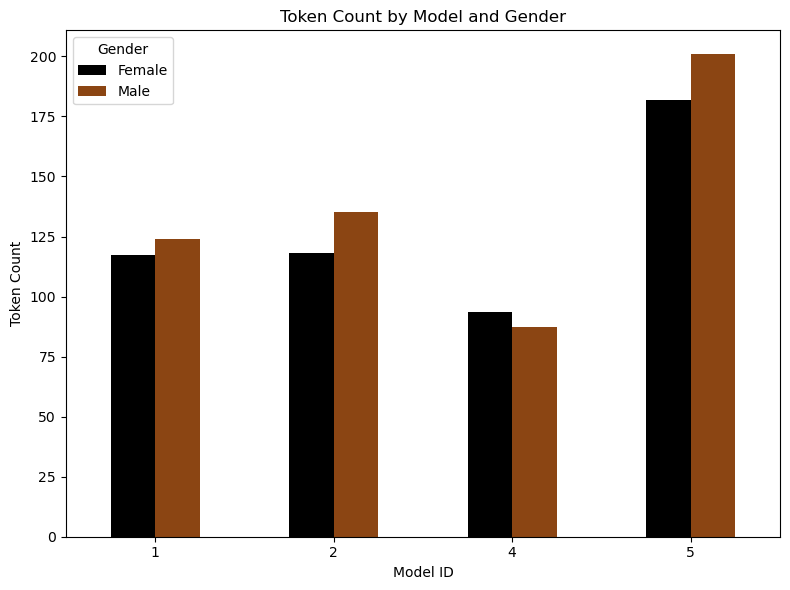

In [ ]:
# View how wordy responses are by Gender

# Group data by model_id and gender, then sum token_counts
grouped_data = df.groupby(['Model_ID', 'Gender_Prompt'])['token_count'].mean().unstack()

# Your color palette
palette = {"Male": "#8B4513", "Female": "#000000"}  # Brown for Male, Black for Female

# Create the bar chart
ax = grouped_data.plot(kind='bar', color=[palette[g] for g in grouped_data.columns], figsize=(8, 6))

# Customize the chart
plt.title('Token Count by Model and Gender')
plt.xlabel('Model ID')
plt.ylabel('Token Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Gender')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

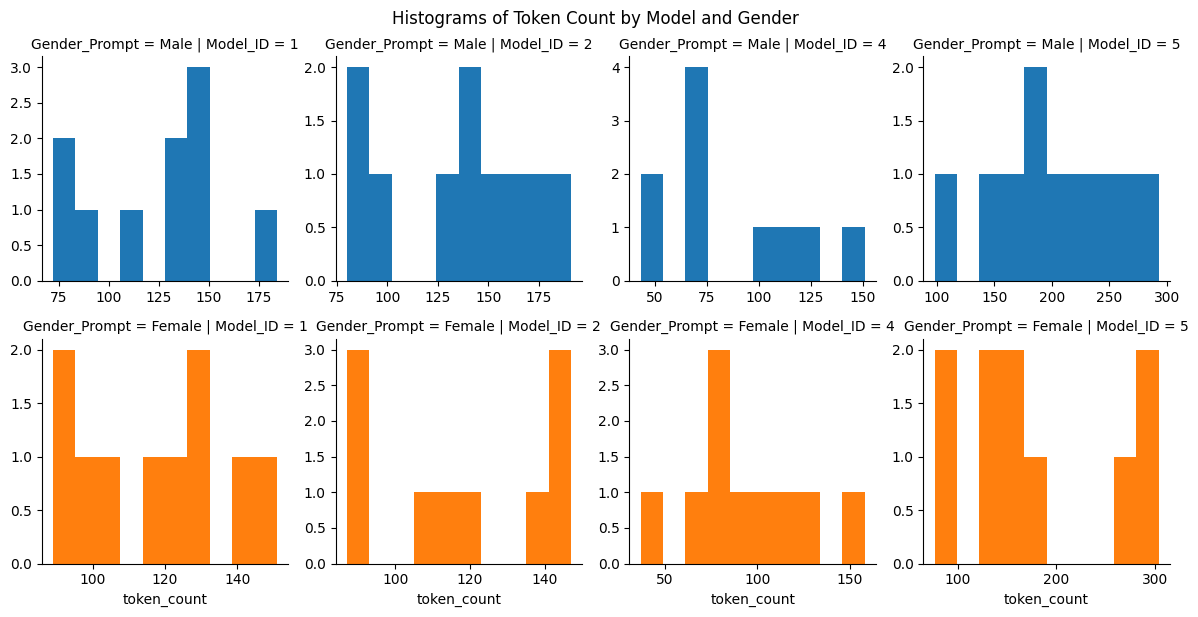

In [16]:
#Generate distributions of gender and token count by model
g = sns.FacetGrid(df, col='Model_ID', row='Gender_Prompt', hue='Gender_Prompt', sharex=False, sharey=False)
g.map(plt.hist, 'token_count')
plt.suptitle('Histograms of Token Count by Model and Gender', y=1.02)  # Add a title
plt.show()

##### Checking for 'tools' and 'technologies' in the tokens category

- Tableau is the standout tool

In [ ]:
target_words = ['tableau', 'power bi', 'excel', 'python', 'sql']
word_counts = {}

for word in target_words:
    word_counts[word] = 0  # Initialize counts
    for tokens in df['model_response_clean']:
        word_counts[word] += tokens.count(word)

print(word_counts)


{'tableau': 13, 'power bi': 0, 'excel': 0, 'python': 0, 'sql': 0}


Only specified Tableau in prompts no other tool?? Could there be a tool bias?

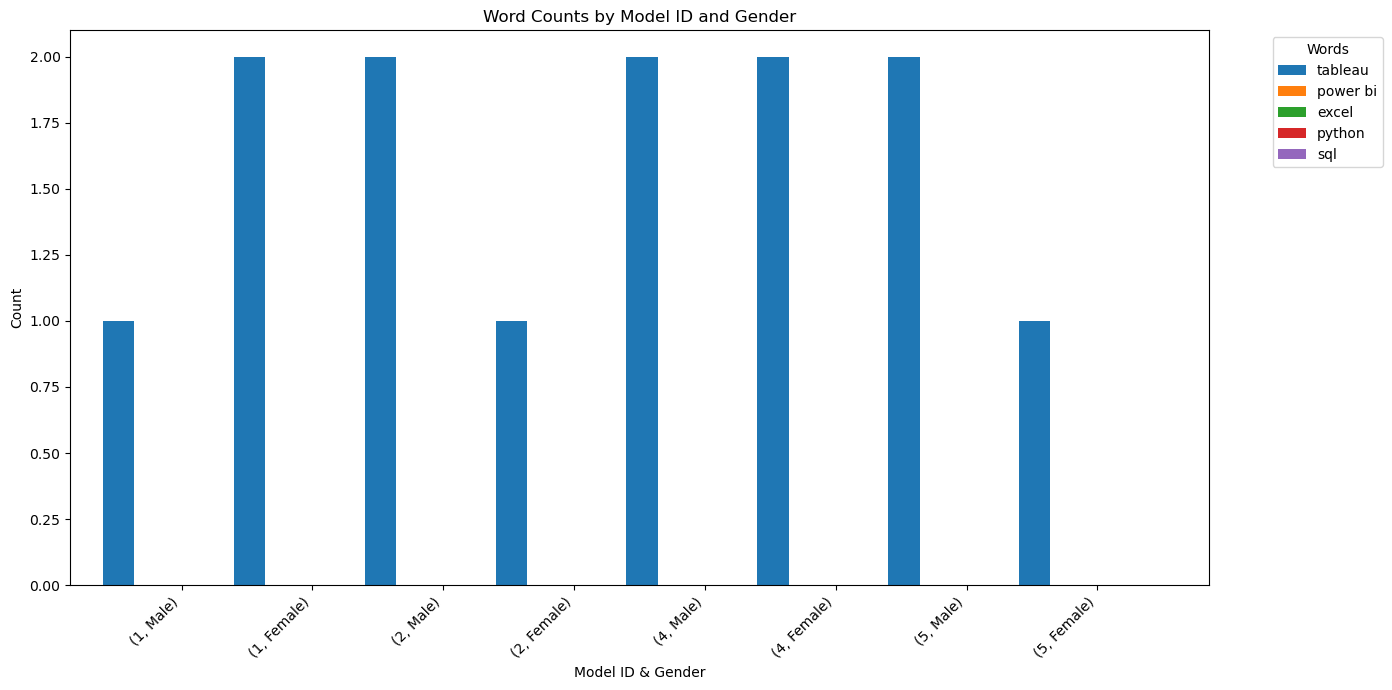

In [ ]:
target_words = ['tableau', 'power bi', 'excel', 'python', 'sql']

word_counts_by_model_gender = {}

for model_id in df['Model_ID'].unique():
    word_counts_by_model_gender[model_id] = {}
    for gender in df['Gender_Prompt'].unique():
        word_counts_by_model_gender[model_id][gender] = {}
        # Filter for the specific model and gender
        subset = df[(df['Model_ID'] == model_id) & (df['Gender_Prompt'] == gender)]
        for word in target_words:
            count = 0
            for tokens in subset['model_response_clean']:
                count += tokens.count(word)
            word_counts_by_model_gender[model_id][gender][word] = count

# Convert to DataFrame for easier plotting
word_counts_df = pd.DataFrame.from_dict({(i,j): word_counts_by_model_gender[i][j]
                           for i in word_counts_by_model_gender.keys()
                           for j in word_counts_by_model_gender[i].keys()},
                       orient='index')

# Plotting
word_counts_df.plot(kind='bar', figsize=(14, 7),width=1.2)
plt.title('Word Counts by Model ID and Gender')
plt.xlabel('Model ID & Gender')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Words', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()
plt.show()


Specified a "tool" 8 times in Male Prompts and 5 times in Female Prompts

**Now look at "industries" given as scenarios or use cases by the models**

In [17]:
target_words = ['customer churn', 'supply chain', 'education', 'marketing', 'healthcare', 'finance', 'business',
               'enviornmental', 'sports', 'retail']
word_counts = {}

for word in target_words:
    word_counts[word] = 0  # Initialize counts
    for tokens in df['model_response_clean']:
        word_counts[word] += tokens.count(word)

print(word_counts)

{'customer churn': 14, 'supply chain': 3, 'education': 4, 'marketing': 19, 'healthcare': 2, 'finance': 0, 'business': 36, 'enviornmental': 0, 'sports': 0, 'retail': 6}


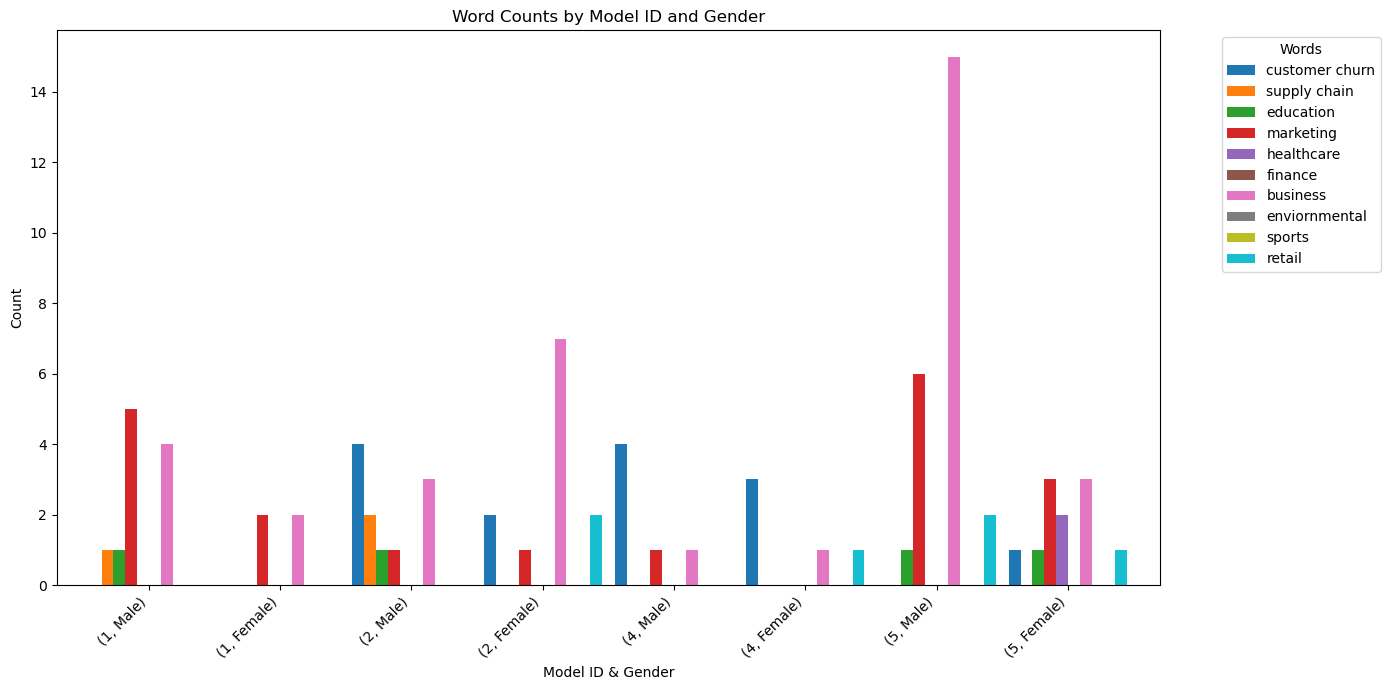

In [ ]:
target_words = ['customer churn', 'supply chain', 'education', 'marketing', 'healthcare', 'finance', 'business',
               'enviornmental', 'sports', 'retail']
word_counts_by_model_gender = {}

for model_id in df['Model_ID'].unique():
    word_counts_by_model_gender[model_id] = {}
    for gender in df['Gender_Prompt'].unique():
        word_counts_by_model_gender[model_id][gender] = {}
        # Filter for the specific model and gender
        subset = df[(df['Model_ID'] == model_id) & (df['Gender_Prompt'] == gender)]
        for word in target_words:
            count = 0
            for tokens in subset['model_response_clean']:
                count += tokens.count(word)
            word_counts_by_model_gender[model_id][gender][word] = count

# Convert to DataFrame for easier plotting
word_counts_df = pd.DataFrame.from_dict({(i,j): word_counts_by_model_gender[i][j]
                           for i in word_counts_by_model_gender.keys()
                           for j in word_counts_by_model_gender[i].keys()},
                       orient='index')

# Plotting
word_counts_df.plot(kind='bar', figsize=(14, 7), width=0.9)
plt.title('Word Counts by Model ID and Gender')
plt.xlabel('Model ID & Gender')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Words', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()
plt.show()


"Business" could be an industry or referred to as a synonym for company

Marketing examples were the most widely used industry (and mentioned the most in male prompts)

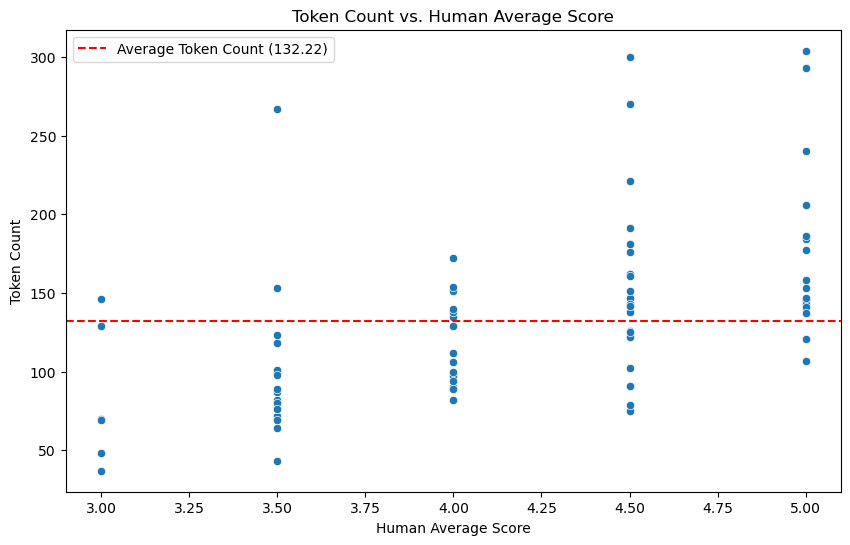

In [ ]:
# Calculate average token count
average_token_count = df['token_count'].mean()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Human_Avg_Score', y='token_count', data=df)
plt.axhline(average_token_count, color='red', linestyle='--', label=f'Average Token Count ({average_token_count:.2f})')
plt.title('Token Count vs. Human Average Score')
plt.xlabel('Human Average Score')
plt.ylabel('Token Count')
plt.legend()  # Make sure to include plt.legend() to display the label
plt.show()


Do humans think more words the better?

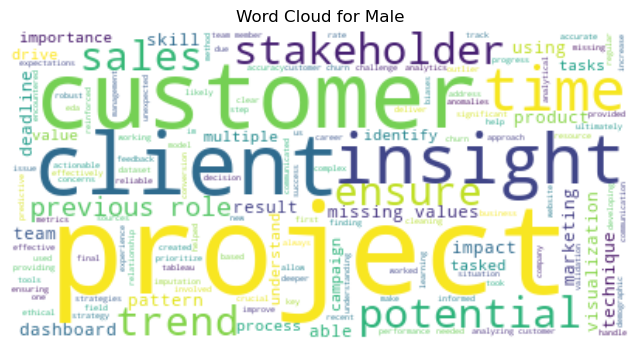

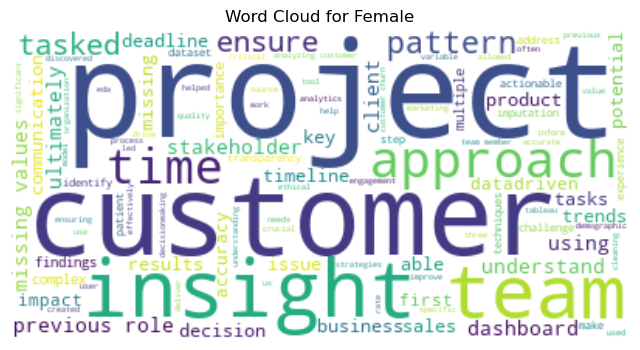

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["data", "analyst", "analysis"])  # Add common words that should be in the response

# Create word clouds by gender
for gender in df['Gender_Prompt'].unique():
    text = " ".join([" ".join(tokens) for tokens in df[df['Gender_Prompt'] == gender]['tokens']])
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {gender}")
    plt.show()


**A lot of similarities between words used in each prompt regardless of sex**